## Project 6 EDA Notebook
**Title**: Specification for Project 6 EDA Notebook   
**Author**: Ryan Krabbe  
**Date**: 6/04/24  
**Purpose**: Project 6 is an opportunity to create your own custom exploratory data analysis (EDA) project using GitHub, Git, Jupyter, pandas, Seaborn and other popular data analytics tools.

## Import Dependencies

In [3]:
#Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pyarrow as pa

In [4]:
# Load the tips dataset into DataFrame
df = sns.load_dataset('tips')

# Inspect first rows of the DataFrame
print(df.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


## Data Inspection

In [5]:
print(df.head(10))
print(df.shape)
print(df.dtypes)

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4
5       25.29  4.71    Male     No  Sun  Dinner     4
6        8.77  2.00    Male     No  Sun  Dinner     2
7       26.88  3.12    Male     No  Sun  Dinner     4
8       15.04  1.96    Male     No  Sun  Dinner     2
9       14.78  3.23    Male     No  Sun  Dinner     2
(244, 7)
total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object


## Descriptive Statistics

In [6]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


## Plot Histogram For total_bill Column

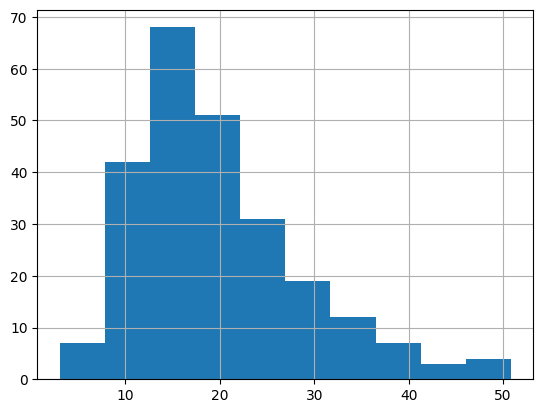

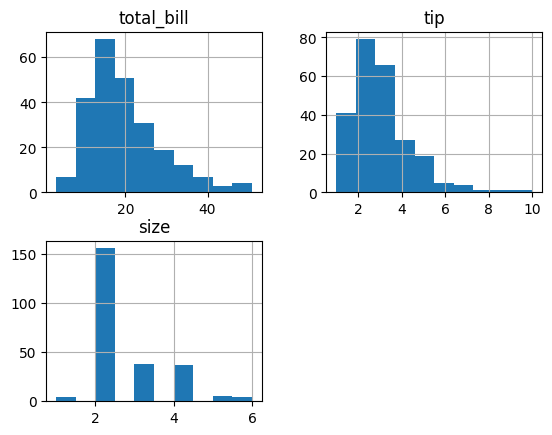

In [18]:
# Inspect histogram by numerical column
df['total_bill'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

**Histogram of Total Bill**: The histogram of the total bill shows the distribution of total bills. The x axis represents the ranges of total bill values. The y-axis represents the number of total bill amounts that fall into the bins. From the histogram I inferred that there is a common range of total bills from 10 to 20 with most of the data compiling in that range. There are outliers to that range, but most of the data falls within the 10-20 range.

**Histogram of Numerical Columns** The tip column's data is mainly skewed towards the left side of the histogram meaning that the tips are on the smaller end. Most tips fall in the range of 1 to 4.
The size column's data indicates that a party of 2 is by far the highest size. Most parties tend to fall between 2 and 4 with a few outliers.

## Displaying the Count of Each Categorical Column with Plots

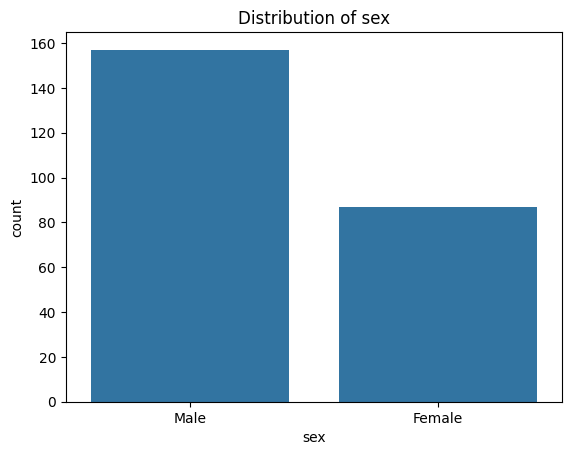

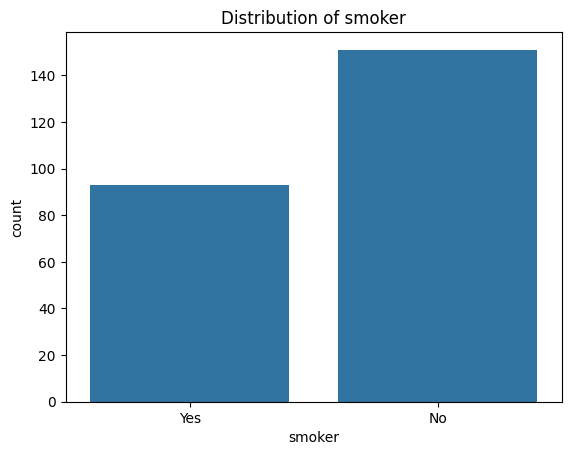

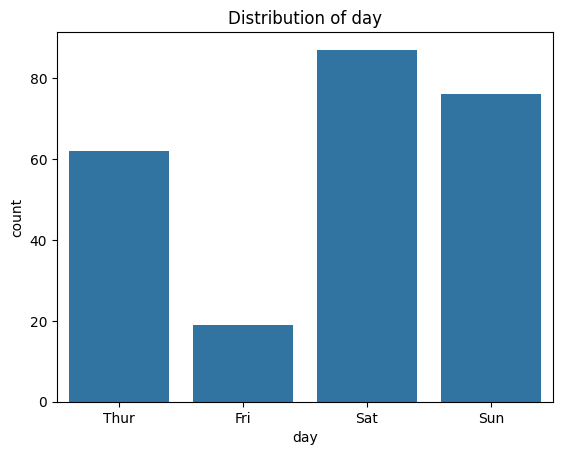

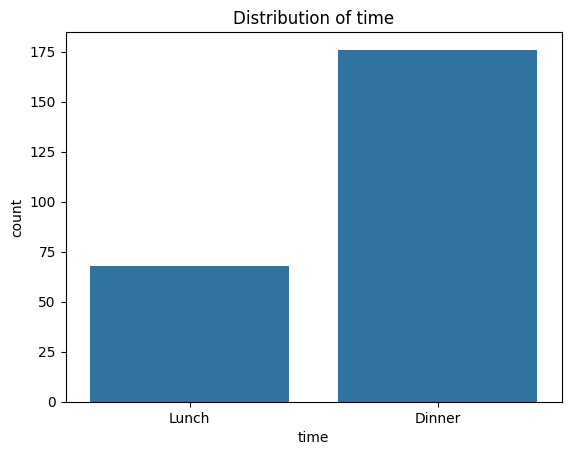

In [19]:
# Inspect value counts for all categorical columns
df['tip'].value_counts()

# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category']).columns:
    # Display count plot
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()

# Show all plots
plt.show()    

**Distribution of Sex** The plot shows that there are more male customers than female customers.

**Distribution of Smoker** The plot shows that there are more non-smokers than smokers.

**Distribution of Day** The plot shows that Saturday and Sunday are the days that receive the most tips. From the plot I can infer that there are more customers dining in and giving tips on the weekends than week days.

**Distribution of Time** The plot shows that there are more data entries for dinner than lunch.

**Conclusion** The main takeaway that I received from this data is how easy it is to differentiate the different data points with the use of the plot graphs. I can clearly tell where the data is skewed by looking at the graphs.

## Data Transformation and Engineering

In [22]:
# Rename the column
tips.rename(columns={'sex': 'gender'}, inplace=True)
tips.rename(columns={'time': 'meal'}, inplace=True)

# Add a new column
tips['total_including_tip'] = tips['total_bill'] + tips['tip']

# Print transformations
print(tips.head())

# Print column names
print(tips.columns)

   total_bill   tip  gender smoker  day    meal  size  total_including_tip
0       16.99  1.01  Female     No  Sun  Dinner     2                18.00
1       10.34  1.66    Male     No  Sun  Dinner     3                12.00
2       21.01  3.50    Male     No  Sun  Dinner     3                24.51
3       23.68  3.31    Male     No  Sun  Dinner     2                26.99
4       24.59  3.61  Female     No  Sun  Dinner     4                28.20
Index(['total_bill', 'tip', 'gender', 'smoker', 'day', 'meal', 'size',
       'total_including_tip'],
      dtype='object')


## Rename Column
I used data transformation to rename the 'sex' column to 'gender' and the 'time' column to 'meal'.

# Add New Column
I added the column 'total_including_tip' by taking the existing 'total_bill' column and adding it to the existing 'tip' column. The 'total_including_tip' column represents the total amount spent including the tip.

## Initial Visualizations

**How do the different numercial columns in the tips data set correlate with each other?**

I wanted to use a different graph here that I haven't used before so I'm going to use a heatmap. The heatmap will provide a clear visualization of the different correlations between the columns using differnt colors, color shades, values and scales.

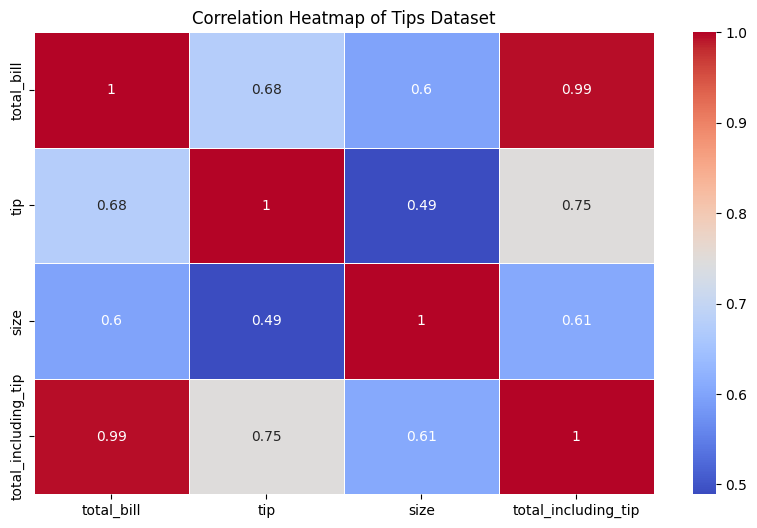

In [24]:
# Select only the numeric columns
numeric_cols = tips.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_cols.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, linecolor='white')
plt.title('Correlation Heatmap of Tips Dataset')
plt.show()

**Observations** The dark red cells between the 'total_bill' column and 'tip' indicate a strong positive correlation. This means that when the total bill is higher the tip will be higher as a result of the high total bill. I can also infer from this heatmap that there might be a possible negative correlation between low size and low tip indicated by the dark blue color. The heatmap suggests that when the party size is smaller the tip tends to be lower.

**How do the tip amount and total_bill amount vary between the different days of the week?**

This question will be answered using a scatterplot. Through the use of the scatterplot I can easily identify trends and outliers in the data that will clearly show which day(s) of the week are associated with higher tipping and total bill.

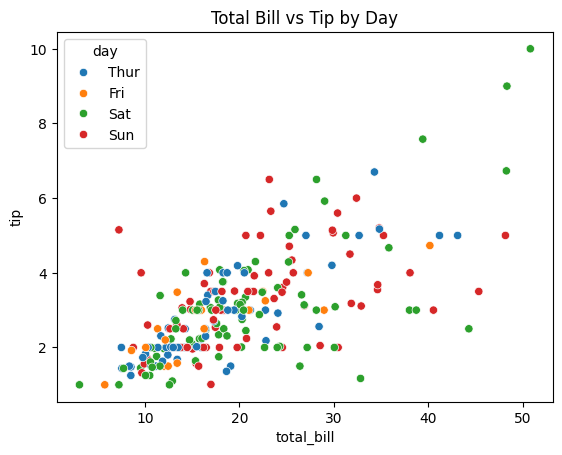

In [25]:
# Create a scatterplot
sns.scatterplot(x='total_bill', y='tip', data=tips, hue='day')
plt.title('Total Bill vs Tip by Day')
plt.show()

**Observations** The scatterplot clearly indicates that high tipping and total bills are heavily correlated with the weekend and especially Saturday night. In the top right of the scatterplot there are a few outliers clearly indicating that Saturday night receives the highest total bill and tips. Interestling, the tipping on Thursday seems to be higher than the tipping on Friday regardless of the total bill. I would've thought the tipping on Friday would've been higher than Thursday since it is the start of the weekend and the total bill tends to be higher on the weekends, but the scatterplot proved me wrong.

**How do the tip amount and total_bill amount vary between different genders?**

This question will be answered using a Facet Grid. This is another graph that I have not used before so I'm excited to see how the data is visualized and what trends can be identified by the Facet Grid.

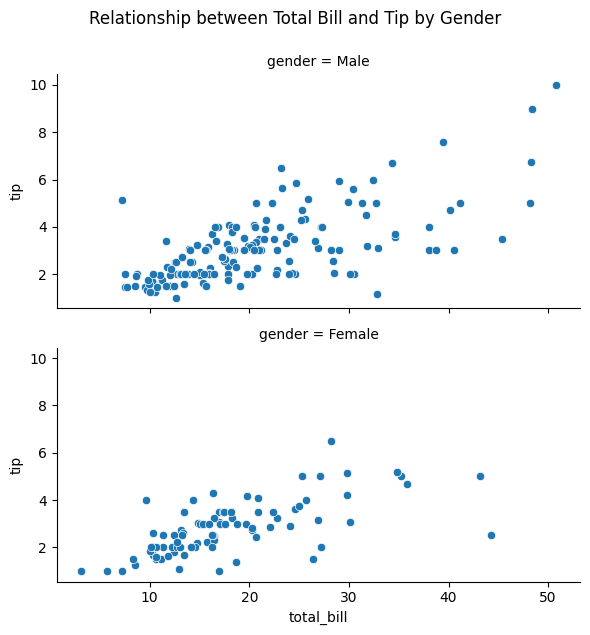

In [27]:
# Create a Facet Grid with 'gender' as the variable
grid = sns.FacetGrid(tips, row='gender', height=3, aspect=2)

# Map scatter plots to the grid
grid.map(sns.scatterplot, 'total_bill', 'tip')

# Add a title to the Facet Grid
grid.fig.suptitle('Relationship between Total Bill and Tip by Gender', y=1.05)

# Show the plot
plt.show()

**Conclusion** As we have learned with the previous graphs there is a strong positive correlation between total bill and tip amount. The same positive correlation between the two applies here regardless of gender. The new information I gathered from this Facet Grid above suggests the tipping from males is higher than the tipping from females regardless of the total bill. There are several instances visualized by the Facet Grid where the total_bill for the males and females are relatively the same, but the tip is higher from the male based on the data we were presented with in the data set.